# Data Analysis - Campus Mty

In [1]:
%run .\DA-cleaning.ipynb

In [2]:
%run .\functions.ipynb

In [3]:
#Conditions
c1 = data['Campus']=='Campus Monterrey';
c2 = data['División'] == 'IN - Esc. Ingeniería y Ciencias'
c3 = data['sni_yn'] == 'SNI'
c4 = data['mxn_yn'] == 'Mexicano'

## Campus Mty

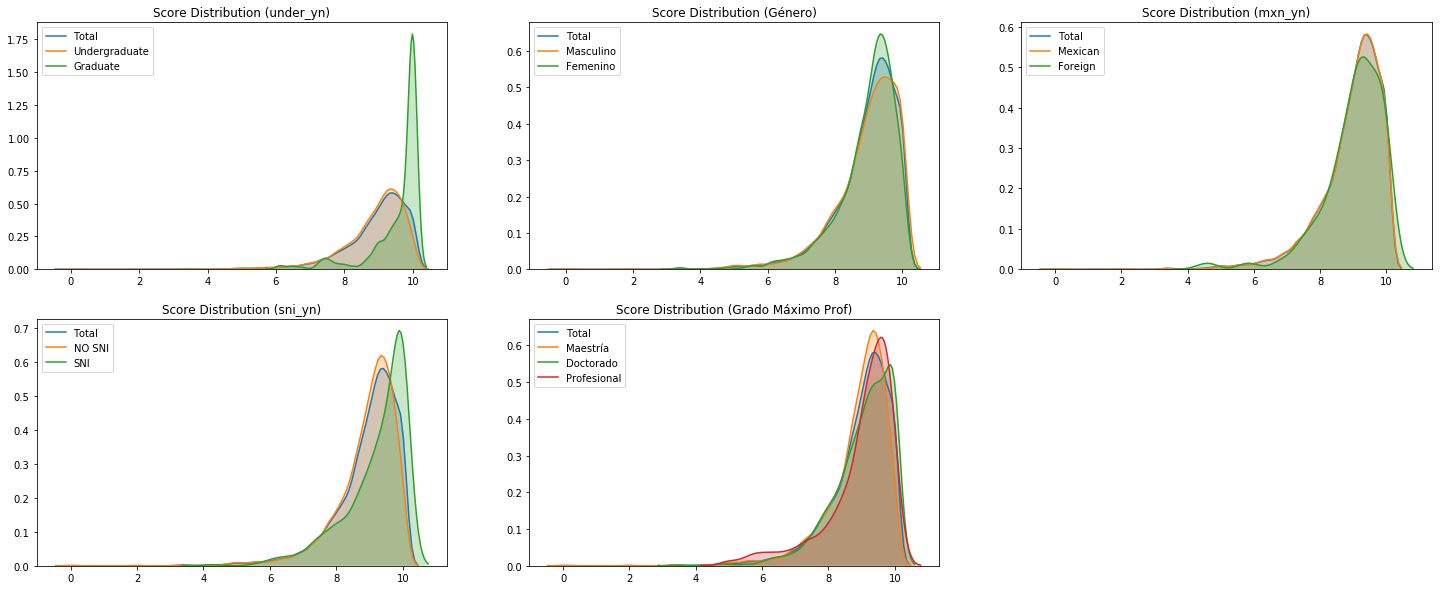

In [5]:
plt.figure(figsize=(25,10))       # set dimensions of the figure

plt.subplot(2,3, 1);     distribution_plot(data[c1],'under_yn')
plt.subplot(2,3, 2);     distribution_plot(data[c1],'Género')
plt.subplot(2,3, 3);     distribution_plot(data[c1],'mxn_yn')
plt.subplot(2,3, 4);     distribution_plot(data[c1],'sni_yn')
plt.subplot(2,3, 5);     distribution_plot(data[c1],'Grado Máximo Prof')
plt.show()

To do:
- $\chi^2$-test (verify if the distributions are different with certai)

## Análisis de Datos (Campus MTY)

In [6]:
data[c1][['ID','División']].groupby(['División'],as_index=False).count()

,División,ID
0,16 - Medicina y Ciencias de Salud,445
1,18 - Div Desarrollo y Serv Académic,62
2,21 - Dir de Asuntos Estudiantiles,11
3,32 - Negocios,684
4,33 - Esc de Ingeniería,368
5,62 - Biotecnología y Alimentos N,42
6,"69 - Arq, Arte y Diseño",341
7,77 - Dir. Desarrollo Int y Plan Est,537
8,IN - Esc. Ingeniería y Ciencias,1467
9,SG - Div. Ciencias Sociales y Gob,354


In [13]:
profesores_por_campus = data[['Campus','ID']].groupby(['Campus'],as_index=False).count()
profesores_por_campus['porcentaje'] = profesores_por_campus['ID']/len(data)*100
profesores_por_campus = profesores_por_campus.sort_values(['ID'],ascending=False)
profesores_por_campus.head()

,Campus,ID,porcentaje
13,Campus Monterrey,4311,27.317660
5,Campus Ciudad de México,1545,9.790254
8,Campus Guadalajara,1528,9.682530
7,Campus Estado de México,1295,8.206071
17,Campus Querétaro,1068,6.767632


Las variables seleccionadas para este primer análisis son:
- sni_sn (posteriormente podríamos incluir el nivel de sni)
- prof_sn (profesional o posgrado)
- calif (posteriormente se podría incluir la respuesta de cada pregunta)

In [16]:
data_mty = data[c1].copy()
data_mty.score.describe()

count    4290.000000
mean        8.959448
std         0.932297
min         0.000000
25%         8.600000
50%         9.166667
75%         9.600000
max        10.000000
Name: score, dtype: float64

El 50% de los profesores están por debajo de 9.2, por lo que llamaremos a estos como profesores ***"malos"***.
Creamos un df temporal de profesores de campus MTY, en donde agregaremos la columna de bueno o malo (bueno_sn)

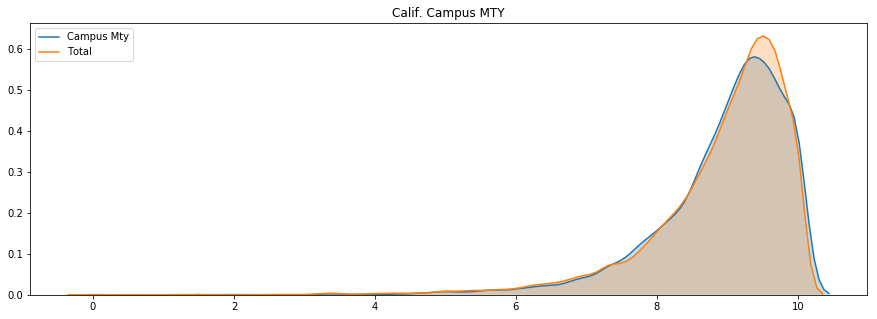

In [25]:
a = [];
for index,value in enumerate(data_mty.score):
    if value <= data_mty.score.describe()['50%']:
        a.append('malo')
    else:
        a.append('bueno')
data_mty['bueno_yn'] = a;

fig, ax = plt.subplots(figsize=(15,5))
ax.grid(False)
sns.kdeplot( data_mty.loc[data_mty.score != 0,'score'], label = 'Campus Mty', shade = True)
sns.kdeplot( data.score, label = 'Total', shade = True)
plt.title('Calif. Campus MTY')
plt.show()

<Figure size 432x288 with 0 Axes>

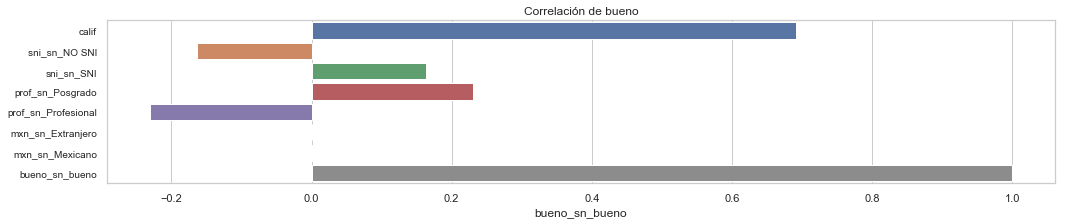

In [298]:
# Barplot de correlaciones de variables económicas contra la cantidad de cajeros a 300m
cor_temp = pd.get_dummies(data_mty[['sni_yn','prof_yn','mxn_yn','score','bueno_yn']]).drop(['bueno_yn_malo'],axis=1).corr()
title = 'Correlación de bueno'

y_index = cor_temp.index
values_cor = cor_temp['bueno_yn_bueno']

correlations_barplot(y_index,values_cor,title)

Lo que nos dice las correlaciones anteriores es que un profesor investigador (SNI) o que de clases de posgrado tiene una correlación positiva con ser calificado como bueno. Mientras que una negativa con ser calificado como malo con no ser investigador y dar clases de profesional. La variable de nacionalidad presenta una correlación 0.

¿Cuántos SNIs dan clases en profesional o posgrado?

In [356]:
sni_prof = data_mty[['sni_yn','ID_Prof','prof_yn']].groupby(['sni_yn','prof_yn'],as_index = False).count()
a = [];
for index,value in enumerate(sni_prof.sni_sn):
    a.append(sni_prof['ID_Prof'][index]/ len(data_mty[data_mty.sni_sn == sni_prof.sni_sn[index]])*100)
sni_prof['porcentaje'] = a 
sni_prof

,sni_sn,prof_sn,ID_Prof,porcentaje
0,NO SNI,Posgrado,74,2.119129
1,NO SNI,Profesional,3418,97.880871
2,SNI,Posgrado,368,44.932845
3,SNI,Profesional,451,55.067155


De la tabla anterior podemos ver que prácticamente todos los profesores no investiadores dan clases en profesional (97%). Mientras que los profesores investigadores están cerca del 50%

In [337]:
buenos_posgrado = data_mty[['bueno_yn','prof_yn','ID_Prof']].groupby(['bueno_yn','prof_yn'],as_index=False).count()
buenos_posgrado['porcentaje'] = buenos_posgrado['ID_Prof']/len(data_mty)*100
buenos_posgrado

,bueno_sn,prof_sn,ID_Prof,porcentaje
0,bueno,Posgrado,359,8.327534
1,bueno,Profesional,1671,38.761308
2,malo,Posgrado,83,1.925307
3,malo,Profesional,2198,50.985850


Para el caso de clases de Profesional y Posgrado se nota una relación más significativa. El 80% de las profesores de clases de Posgrado poseen calificaciones positivas, mientteas que para las clases de profesional se mantiene la distribución de cerca del 50% (43% son buenos), con mayor cantidad de calificaciones malas.

In [358]:
buenos_sni_posgrado = data_mty[['sni_yn','bueno_yn','prof_yn','ID_Prof']].groupby(['sni_yn','bueno_yn','prof_yn'],as_index=False).count()
buenos_sni_posgrado['porcentaje'] = buenos_sni_posgrado['ID_Prof']/len(data_mty)*100
buenos_sni_posgrado

,sni_sn,bueno_sn,prof_sn,ID_Prof,porcentaje
0,NO SNI,bueno,Posgrado,56,1.299003
1,NO SNI,bueno,Profesional,1450,33.634887
2,NO SNI,malo,Posgrado,18,0.417537
3,NO SNI,malo,Profesional,1968,45.650661
4,SNI,bueno,Posgrado,303,7.028532
5,SNI,bueno,Profesional,221,5.126421
6,SNI,malo,Posgrado,65,1.507771
7,SNI,malo,Profesional,230,5.335189


Si SNI y bueno 64.7%. Esto nos dice que cerca de 2/3 de los investigadores son calificados como buenos

No SNI y bueno 43.12%. Esto nos dice que predominan las calificaciones malas para profesores



Si SNI y de profesional 55.06%. Esto nos dice que los investigadores dan clases tanto de prof. como de posgrado de manera equilibrada

No SNI y de profesional 97.88%. Esto nos dice que los profesores predominan en las clases de profesional



Si SNI, posgrado y bueno 82%

Si SNI, profesional y bueno 38%

No SNI, posgrado y bueno 76%

No SNI, profesional y bueno 42%

Veemos que en general los alumnos de posgrado califican mejor que los de profesional, independientemente de si son SNI o no. 

- Que características comparten los SNI buenos

- Que características comparten los profesores buenos

In [92]:
#